In [5]:
import xarray as xr
import pandas as pd
import numpy as np
from datetime import datetime as dt
from metpy.units import units
import metpy.calc as mpcalc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

In [19]:
ds = xr.open_dataset('/cfsr/data/mean/pmsl.mean.0p5.anl.nc', decode_times=False)
ds

<xarray.Dataset>
Dimensions:  (time: 1464, lat: 361, lon: 720)
Coordinates:
  * time     (time) float64 0.0 6.0 12.0 18.0 ... 8.766e+03 8.772e+03 8.778e+03
  * lat      (lat) float32 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float32 -180.0 -179.5 -179.0 -178.5 ... 178.5 179.0 179.5
Data variables:
    pmsl     (time, lat, lon) float32 ...
Attributes:
    comments:       Created by Alan Brammer
    description:    Annual Cycle using 4 Harmonics to smooth temporally
    creation_date:  Thu Sep 17 13:09:34 UTC 2015
    source_file:    /cfsr/data/

In [15]:
jf = ds.isel(time=slice(0, 236))
d = ds.isel(time=slice(-124, 0))

In [26]:
climo_months = xr.concat([d, jf], dim='time')
climo_months

<xarray.Dataset>
Dimensions:  (time: 236, lat: 361, lon: 720)
Coordinates:
  * time     (time) float64 0.0 6.0 12.0 18.0 ... 1.398e+03 1.404e+03 1.41e+03
  * lat      (lat) float32 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float32 -180.0 -179.5 -179.0 -178.5 ... 178.5 179.0 179.5
Data variables:
    pmsl     (time, lat, lon) float32 1.007e+05 1.007e+05 ... 1.015e+05
Attributes:
    comments:       Created by Alan Brammer
    description:    Annual Cycle using 4 Harmonics to smooth temporally
    creation_date:  Thu Sep 17 13:09:34 UTC 2015
    source_file:    /cfsr/data/

In [31]:
mslp = climo_months['pmsl']
mslp = mslp.metpy.convert_units('hPa')

In [36]:
mslp_mean = mslp.mean(dim='time')

In [38]:
mslp_mean.min(), mslp_mean.max()

(<xarray.DataArray 'pmsl' ()>
 <Quantity(982.6349487304688, 'hectopascal')>,
 <xarray.DataArray 'pmsl' ()>
 <Quantity(1034.5579833984375, 'hectopascal')>)

In [41]:
lats = ds.lat
lons = ds.lon

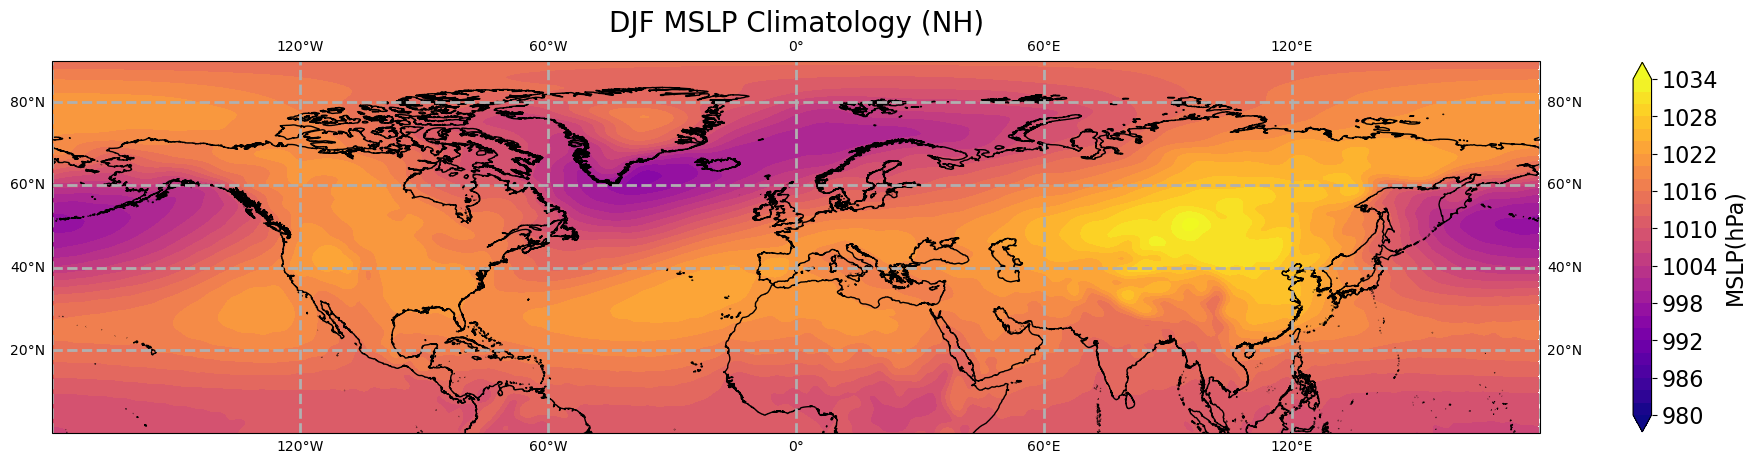

In [67]:
lonW = -180
lonE = 180
latS = 0
latN = 90
cLat, cLon = (latS + latN)/2, (lonW + lonE)/2
res = '10m'
fig = plt.figure(figsize=(24,24)) 
ax = plt.subplot(1,1,1,projection=ccrs.PlateCarree())
ax.set_extent ([lonW,lonE,latS,latN])
ax.add_feature(cfeature.COASTLINE.with_scale(res))
ax.gridlines(draw_labels=True, linestyle='dashed', linewidth=2)
CF = ax.contourf(lons,lats,mslp_mean,levels=np.arange(980, 1036, 2), extend='both', cmap='plasma') 
cbar = plt.colorbar(CF,shrink=.2)
cbar.ax.tick_params(labelsize=16)
cbar.ax.set_ylabel('MSLP(hPa)',fontsize=16)
ax.set_title('DJF MSLP Climatology (NH)', fontsize=20);

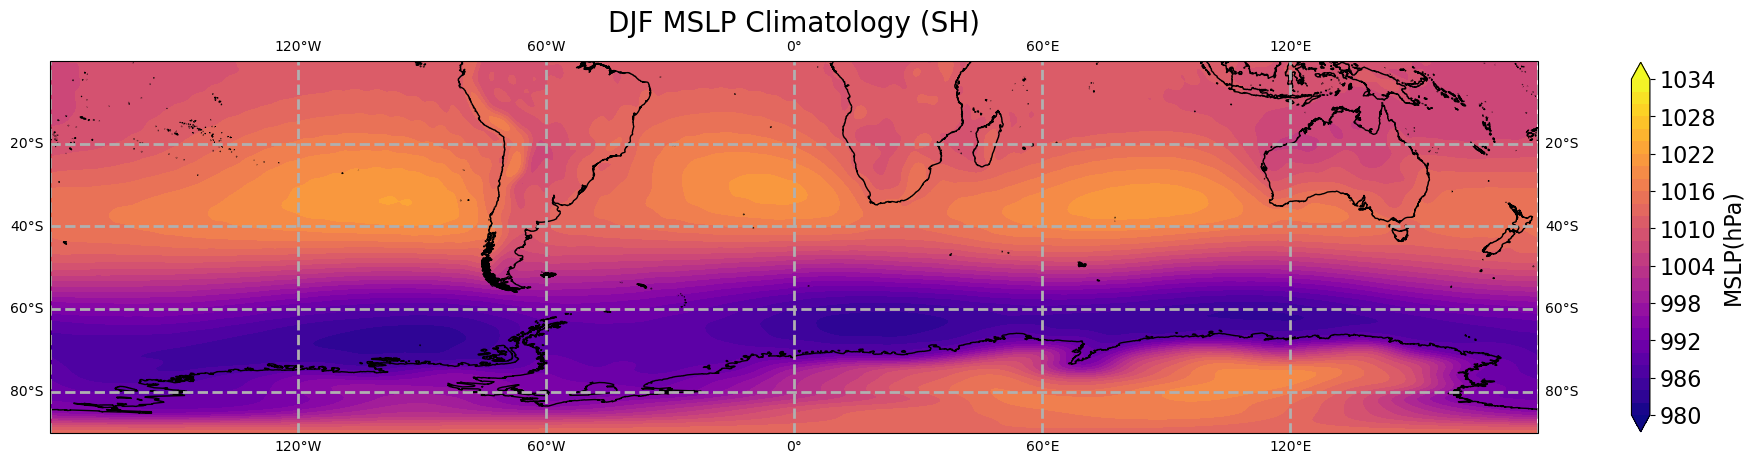

In [68]:
lonW = -180
lonE = 180
latS = -90
latN = 0
cLat, cLon = (latS + latN)/2, (lonW + lonE)/2
res = '10m'
fig = plt.figure(figsize=(24,24)) 
ax = plt.subplot(1,1,1,projection=ccrs.PlateCarree())
ax.set_extent ([lonW,lonE,latS,latN])
ax.add_feature(cfeature.COASTLINE.with_scale(res))
ax.gridlines(draw_labels=True, linestyle='dashed', linewidth=2)
CF = ax.contourf(lons,lats,mslp_mean,levels=np.arange(980, 1036, 2), extend='both' ,cmap='plasma') 
cbar = plt.colorbar(CF,shrink=.2)
cbar.ax.tick_params(labelsize=16)
cbar.ax.set_ylabel('MSLP(hPa)',fontsize=16)
ax.set_title('DJF MSLP Climatology (SH)', fontsize=20);